In [1]:
# 读取可能用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from tqdm import tqdm
import os

from mysystem.utils import zscore
from mysystem.dataset import get_data
from mysystem.backtest import Backtest
from mysystem.alphapool import AlphaPool

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 设置路径为本repo(quantitative_trading_system文件夹)的路径
PATH = './'

In [3]:
# 读取数据, 首次读取可能需要花费一定时间(数十秒), 
# 首次读取时会存储数据, 之后调取时会直接从存储的.pkl文件读入
data = get_data(PATH)

In [4]:
# data的所有字段
data.keys()

dict_keys(['date', 'id', 'volume', 'open', 'high', 'low', 'close', 'ret', 'vwap'])

In [5]:
# 创建一个回测类, 时间段为20200101-20221231, 股票池为沪深全股票
backtest = Backtest(PATH, '20200101', '20221231', pool = 'all')

In [6]:
# 计算5日反转因子
ret5d = data['ret'].rolling(5).sum()
ret5d[5:].head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,-0.004109,-0.010683,0.000454,0.022483,0.013287,-0.011488,0.016505,0.058365,0.080752,-0.010985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,-0.028440,-0.018001,0.000008,0.006838,-0.003356,-0.013657,0.003071,0.084584,0.129523,-0.006755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,-0.004063,0.005841,0.058203,0.003684,0.013114,-0.017966,0.003085,0.004785,0.074562,0.012275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,-0.022287,-0.011247,0.040807,0.000465,0.002195,-0.018980,-0.002305,-0.057522,0.018036,-0.012133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-15,-0.008035,-0.037400,0.035720,0.006718,0.014955,-0.009559,-0.002354,-0.092019,0.040447,0.005548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ret5d
IC均值,-0.0072
ICIR,-0.0592
rankIC均值,-0.0286
rankICIR,-0.2106
年化收益率,0.1359
年化波动率,0.1299
夏普比率,1.0463
胜率,0.5192


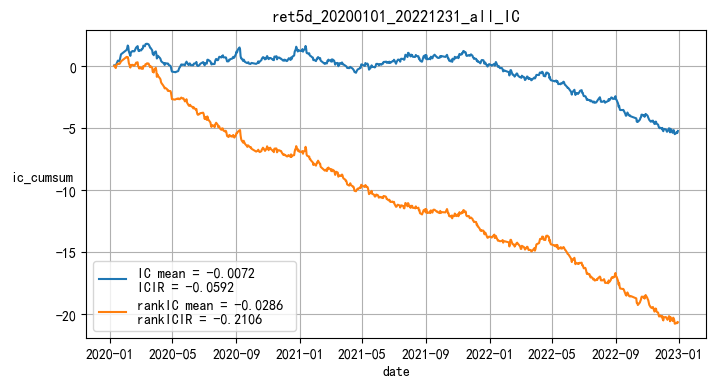

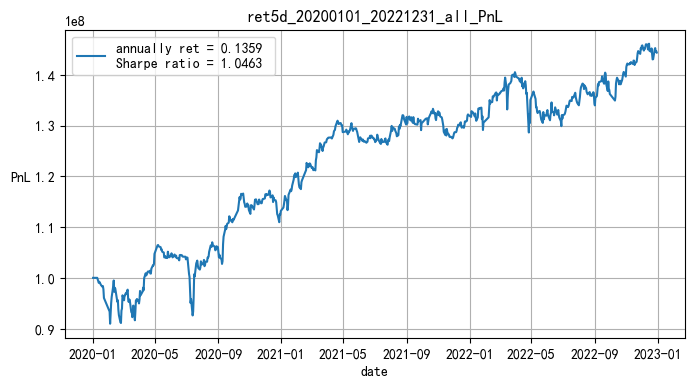

In [7]:
# 回测5日反转因子, 回测区间, 股票池等参数均设为默认值, 即与回测类的参数相同
backtest.backtest(ret5d, 'ret5d')

,ret5d
IC均值,-0.0131
ICIR,-0.0767
rankIC均值,-0.0237
rankICIR,-0.1323
年化收益率,0.2250
年化波动率,0.1157
夏普比率,1.9452
胜率,0.5679


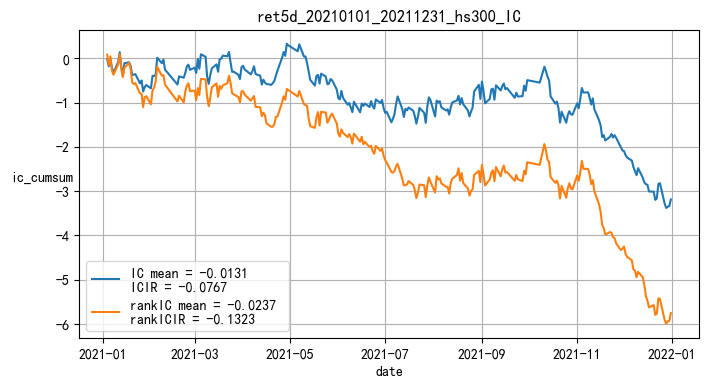

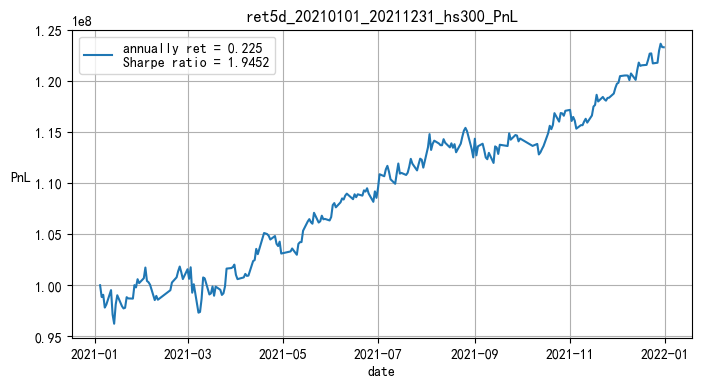

In [8]:
# 在回测类的回测函数中传入不同的start, end, 资产池参数
# 回测5日反转因子, 回测区间为20210101-20211231, 资产池为沪深300成分股(实时追踪), 输出IC, PnL, 回测指标
backtest.backtest(ret5d, 'ret5d', '20210101', '20211231', pool = 'hs300', output = ['ic', 'pnl', 'metrics'])

In [9]:
# 创建一个因子池
alphapool = AlphaPool(PATH, '20200101', '20221231', pool = 'all')

In [10]:
# 将5日反转因子加入因子池
alphapool.add(ret5d, 'ret5d')

In [11]:
# 计算对数成交量因子
vol = -np.log(data['volume'])
vol = zscore(vol) # 去极值, 标准化
vol.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,688787.SH,688788.SH,688789.SH,688793.SH,688798.SH,688799.SH,688800.SH,688819.SH,688981.SH,689009.SH
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-2.382271,-2.041372,1.288465,-0.165892,-0.314874,0.677573,-1.227948,-2.755546,0.643262,0.712702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-2.170598,-1.902916,1.460046,-0.025719,-0.604902,0.705407,-1.121137,-2.550266,1.137786,0.791566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-1.804945,-1.818709,1.234283,0.006087,-0.113987,0.596592,-1.073930,-2.119423,1.091687,0.813999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-1.738873,-1.549181,1.317414,-0.437734,-0.001344,0.676642,-1.058055,-2.828939,0.123346,0.679337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-1.793519,-1.410705,1.467145,-0.736590,-0.108428,0.653642,-1.128831,-2.644404,0.876414,0.758391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,vol
IC均值,0.0145
ICIR,0.1398
rankIC均值,0.0319
rankICIR,0.2730
年化收益率,0.1127
年化波动率,0.0493
夏普比率,2.2865
胜率,0.6016


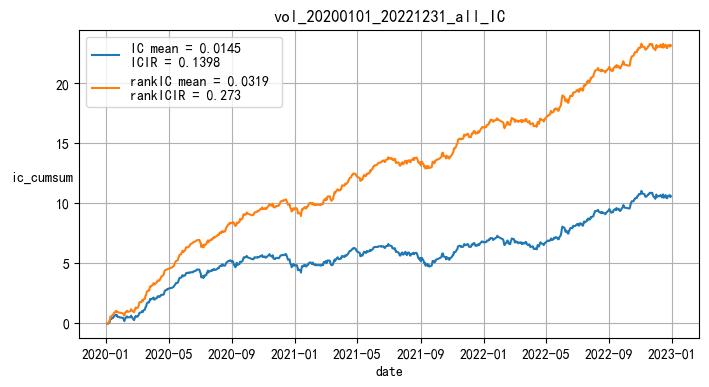

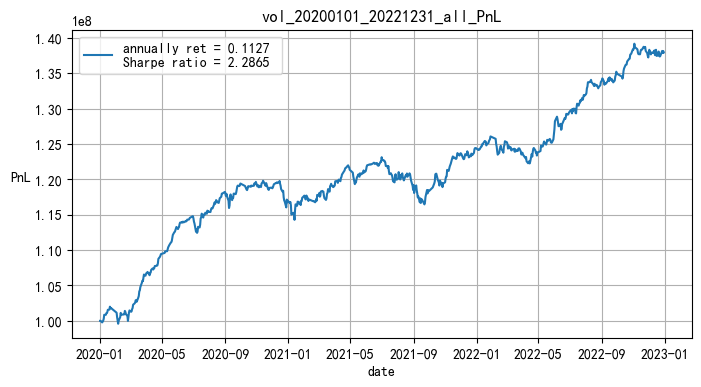

In [12]:
# 回测对数成交量因子
backtest.backtest(vol, 'vol')

,IC均值,ICIR,rankIC均值,rankICIR,年化收益率,年化波动率,夏普比率,胜率,相关系数
vol,0.0145,0.1398,0.0319,0.2730,0.1127,0.0493,2.2865,0.6016,1.000000
ret5d,-0.0072,-0.0592,-0.0286,-0.2106,0.1359,0.1299,1.0463,0.5192,-0.165884


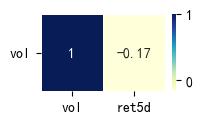

In [13]:
# 计算对数成交量因子与因子池中因子的相关系数, 对比它们的回测指标并绘制相关系数热力图
alphapool.eval(vol, 'vol', sort_index = '夏普比率') # sort_index = '夏普比率': 按夏普比率排序因子

In [14]:
# 将对数成交量因子加入因子池
alphapool.add(vol, 'vol')

In [15]:
# 再次使用因子池时, 可直接使用add_from_path函数读取之前储存过的因子
alphapool_from_file = AlphaPool(PATH, '20200101', '20221231')
alphapool_from_file.add_from_path()
alphapool_from_file.alpha_list.keys()

dict_keys(['ret5d', 'vol'])